# Solutia celor mai mici patrate a unui sistem liniar $Ax=b$

Consideram o matrice $A=[c_1|c_2|\ldots|c_n]\in\mathbb{R}^{m\times n}$, $m\geq n$, un vector $b\in\mathbb{R}^m$ si sistemul liniar
$Ax=b$. 

Un sistem de ecuatii liniare in care numarul ecuatiilor este  strict mai mare decat numarul, $n$, al necunoscutelor  se numeste sistem  supradeterminat.

Daca sistemul supradeterminat $Ax=b$ este incompatibil, atunci nu exista nici un vector $x\in\mathbb{R}^n$ astfel incat $Ax=b$.

In acest caz se determina solutia celor mai mici patrate, adica un vector $x^*\in\mathbb{R}^n$, astfel incat dintre toti vectorii $x$ din $\mathbb{R}^n$, $x^*$ minimizeaza distanta de la $b$ la $Ax$:
$$ ||b-Ax^*||\leq ||b-Ax||\quad \Leftrightarrow \quad ||b-Ax^*||^2\leq ||b-Ax||^2 \quad \forall\: x\in\mathbb{R}^n.$$
Repetam succint cum se determina solutia celor mai mici patrate (vezi Cursul 7):

Sistemul $Ax=b$ fiind incompatibil, vectorul $b\in\mathbb{R}^m$ nu apartine subspatiului $col(A)$, generat de coloanele $c_1, c_2\ldots, c_n\in\mathbb{R}^m$ ale  matricii $A$.  Proiectia ortogonala, $b'$,  a vectorului $b$ pe subspatiul $col(A)$ este o combinatie liniara a coloanelor:

$$b'=x_1^*c_1+x_2^*c_2+\cdots+x_n^*c_n=Ax^*, \quad \mbox{unde}\:\:  x^*=(x_1^*, x_2^*, \ldots, x_n^*)^T$$

Vectorul $x^*$ astfel asociat este solutia celor mai mici patrate a sistemului $Ax=b$. 


$r=b-Ax^*$ este reziduul sistemului, iar norma acestui vector la patrat, $||r||^2=||b-Ax^*||^2$ este eroarea la patrat, eroare ce se comite interpretand pe $x^*$ ca solutie a sistemului $Ax=b$.

In figura urmatoare ilustram problematica aflarii solutiei celor mai mici patrate.

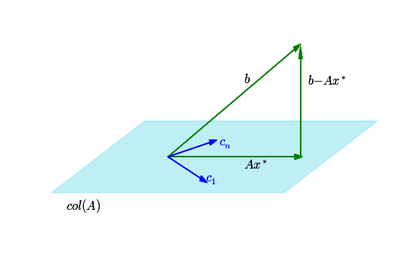

In [1]:
from IPython.display import Image
Image(filename='Imag/leastsq.png')

Solutia celor mai mici patrate a sistemului  Ax=b si caracteristici ale solutiei si problemei celor mai mici patrate se obtin apeland functia [numpy.linalg.lstsq](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html):

`[xstar, rez2, rangA, singA]=np.linalg.lstsq(A,b)`

Functia `np.linalg.lstsq` returneaza o lista  de obiecte:

- `xstar` este array-ul care contine solutia, $x^*$;

- `rez2` este norma la patrat a reziduului: $\mbox{rez2}=\|b-Ax^*\|^2$ 

- `rangA` este rangul matricii `A`

- `singA` sunt valorile singulare ale lui `A` (se vor studia in Cursul 12)
    

- Solutia celor mai mici patrate este solutie a sistemului normal $A^TAx=A^Tb$.

- Deoarece rang($A^TA$)=rang($A$) (vezi Cursul 7), rezulta ca daca coloanele $c_1, c_2, \ldots, c_n$ ale matricii $A$ sunt liniar independente,
 atunci $A$ are rangul $n$, iar sistemul normal are o unica solutie,
$x^*$.

- Daca rangul lui $A$ este mai mic decat $n$ sistemul normal este compatibil nedeterminat si admite o infinitate de solutii $x^*$, astfel incat pentru fiecare dintre ele eroarea de aproximare este minima:

$||b-Ax^*||^2\leq ||b-Ax||^2$, $\forall x\in\mathbb{R}^n$.

Dam cateva exemple de calcul a solutiei celor mai mici patrate:

In [2]:
import numpy as np
A=np.array([[1,2], [-3,1], [5,-1.2], [-2.14, -3.4]], float)
b=np.array([-5, 2,1,3], float)
[xstar, rez2, rang, sing]=np.linalg.lstsq(A,b)
print A.shape
print 'Rangul matricii A este:', rang
print 'Solutia celor mai mici patrate este:', xstar
print 'Norma reziduului la patrat:', rez2

(4L, 2L)
Rangul matricii A este: 2
Solutia celor mai mici patrate este: [-0.30631511 -1.07308095]
Norma reziduului la patrat: [ 14.37779594]


Daca $m=n$ matricea $A$ este patratica. Daca $A$ este  nesingulara, atunci solutia celor mai mici patrate este unica solutie pe care sistemul $Ax=b$ o admite:

In [3]:
A=np.array([[1,0,-1], [2,3,-5], [4,-2, 1]],float)
b=np.array([3, -1, 7], float)
[xstar, rez2, rang, sing]=np.linalg.lstsq(A,b)

print 'Rangul matricii A este:', rang
print 'Solutia celor mai mici patrate este:', xstar
print 'Norma reziduului la patrat:', rez2

Rangul matricii A este: 3
Solutia celor mai mici patrate este: [-0.22222222 -5.55555556 -3.22222222]
Norma reziduului la patrat: []


Rezolvand uzual sistemul normal $A^TAx=A^Tb$ obtinem solutia celor mai mici patrate ca mai sus:

In [4]:
M=np.dot(A.transpose(), A)# 
c=np.dot(A.transpose(), b)# Mx=c -->  x=inv(M)c
xx=np.dot(np.linalg.inv(M), c)
print xx

[-0.22222222 -5.55555556 -3.22222222]


Sa ilustram solutiile analitice ale sistemului $A^TAx=A^Tb$, in cazul in care rangul matricii $A$, 
deci si al matricii $A^TA$ este mai mic decat $n$.
Apoi invocam functia `np.linalg.lstsq(A,b)` si identificam printre solutiile analitice, pe cea numerica returnata de functia `np.linalg.leastsq`.

Pentru aceasta, construim dintr-o lista o matrice din $\mathbb{R}^{6\times 4}$:

In [5]:
L=2*[1, -3, 0, 0, -3,0,0,1, 0,0,1,-3]
A=np.asarray(L, float).reshape((6,4))#convertim lista la un array pe care il  redimensionam
b=np.array([2,8,-3,2,-2,5], float) # vectorul termenilor liberi ai sistemului Ax=b
print A
M=np.dot(A.transpose(), A)#M=A^TA
c=np.dot(A.transpose(), b)# c=A^T b
print M
print c

[[ 1. -3.  0.  0.]
 [-3.  0.  0.  1.]
 [ 0.  0.  1. -3.]
 [ 1. -3.  0.  0.]
 [-3.  0.  0.  1.]
 [ 0.  0.  1. -3.]]
[[ 20.  -6.   0.  -6.]
 [ -6.  18.   0.   0.]
 [  0.   0.   2.  -6.]
 [ -6.   0.  -6.  20.]]
[-14. -12.   2.   0.]


Forma scara redusa a matricii prelungite, $\overline{M}=[M|c]$, a sistemului $Mx=c$ este:

$$S_{\overline{M}}^0=\left[\begin{array}{rrrrr} 1&0&0&-1/3& -1\\0&1&0&-1/9&-1\\0&0&1&-3&1\\0&0&0&0&0\end{array}\right]$$

Prin urmare sistemul $Mx=c$ este compatibil nedeterminat si daca rezolvam sistemul echivalent definit de  forma scara redusa,  de mai sus, avem solutiile:
$$\begin{array}{ll}\begin{array}{lll}
x_1^*&=& \displaystyle\frac{x_4^*}{3}-1\\
x_2^*&=&\displaystyle\frac{x_4^*}{9}-1\\
x_3^*&=&3x_4^*+1\end{array}\quad x_4^*\in\mathbb{R}\end{array}$$

Astfel, pentru fiecare alegere particulara a lui $x_4^*$ (necunoscuta secundara a sistemului) obtinem o alta solutie, $x^*=(x_4^*/3-1, x_4^*/9-1, 3x_4^*+1, x_4^*)^T$, a celor mai mici patrate. Toate aceste solutii au particularitatea ca $Ax^*=b'$, unde $b'$ este proiectia ortogonala a lui $b$ pe subspatiul coloanelor, col(A). $b'$ este unic, in timp ce $x^*$ nu este unic. Cu alte cuvinte aplicatia liniara $L:\mathbb{R}^4\to col(A)$, $L(x)=A*x$ nu este injectiva, pentru ca exista o infinitate de vectori $x^*$ care sunt aplicati in acelasi vector $b'\in col(A)$.

Solutia numerica a celor mai mici patrate pentru sistemul $Ax=b$, unde $A$ si $b$ sunt matricile de mai sus este:
    

In [6]:
[xstar, rez2, rang, sing]=np.linalg.lstsq(A,b)

print 'Rangul matricii A este:', rang
print 'Solutia celor mai mici patrate este:', xstar
print 'Norma reziduului la patrat:', rez2

Rangul matricii A este: 3
Solutia celor mai mici patrate este: [-1.08414634 -1.02804878  0.24268293 -0.25243902]
Norma reziduului la patrat: []


Remarcam ca din infinitatea de solutii analitice, numeric este calculata una singura, corespunzatoare lui
$x_4^*=xstar[3]$  (Atentie!  indexarea coordonatelor lui $x^*$ este tipica pentru matematica, iar ale lui `xstar` 
                   este cea din Python).

Daca incercam sa transmitem ca argument $A$ al functiei `np.linalg.lstsq(A,b)` o matrice avand numarul de linii mai mic decat numarul de coloane,
este afisat un mesaj de eroare, pentru ca solutia celor mai mici patrate exista doar pentru sistemele $Ax=b$, unde numarul liniilor lui $A$ este mai mare sau
egal cu numarul coloanelor:

In [7]:
A=np.array([[2, 3, -4], [1,5,-2]], float)
b=np.array([-1,3,7], float)
[xstar, rez2, rang, sing]=np.linalg.lstsq(A,b)

LinAlgError: Incompatible dimensions

## Aplicatie:  Constructia unui model adecvat pentru date

In experimentele  de laborator sau intr-o observatie statistica se inregistreaza valorile  a doua variabile
$X$ si $Y$, monitorizate: $(x_1,y_1), (x_2, y_2), \ldots, (x_n,y_n)$.
    
 Pentru a putea face predictii relativ la valorile variabilei $Y$ pe baza valorilor lui $X$,
se determina din datele de observatie, o relatie functionala, $Y=f(X)$, intre cele doua variabile, care aproximeaza intr-un anume sens datele observate $(x_i, y_i)$, prin $(x_i, \hat{y}_i=f(x_i))$. Pentru o valoare $X=a$, valoarea predictionata pentru $Y$ este atunci
$\hat{y}=f(a)$.

Determinarea unei relatii functionale  din date se numeste in statistica si machine learning, ajustarea unui  model la date (*fitting a model to data*).

Cel mai simplu model pentru un set de date $(x_i,y_i)$, $i=\overline{1,n}$, $n>2$, este modelul liniar, $y=ax+b$.

Daca punctele $(x_i,y_i)$ nu sunt coliniare, atunci nu exista o dreapta care sa le contina si prin urmare sistemul rezultat impunand ca aceste puncte sa verifice ecuatia $y=ax+b$:
$$\begin{array}{ccc}
ax_1+b&=&y_1\\
ax_2+b&=&y_2\\
\vdots& &\\
ax_n+b&=&y_n\end{array}$$

este un sistem incompatibil supradeterminat, in necunoscutele $a,b$, care sunt parametrii dreptei.

Solutia celor mai mici patrate a acestui sistem este $(a^*, b^*)$ si ea defineste o dreapta
de ecuatie $y=a^*x+b^*$, numita dreapta celor mai mici patrate, deoarece (vezi Cursul 7) aproximand valorile $y_i$ prin $\hat{y}_i=a^*x_i+b^*$, suma erorilor la patrat este minima:

$$\sum_{i=1}^n (y_i-(a^*x_i+b^*))^2\leq \sum_{i=1}^n (y_i-(ax_i+b))^2, \quad \forall\:\: a, b\in\mathbb{R},$$
adica dintre toate dreptele din plan, de ecuatie $y=ax+b$, dreapta $y=a^*x+b^*$ aproximeaza cel mai bine datele.


In Machine learning in locul erorii globale la patrat, $Er=\sum_{i=1}^n(y_i-\hat{y}_i)^2$, returnate de `np.linalg.lstsq`,
se analizeaza media aritmetica a erorilor la patrat,  calculate in fiecare punct: 
    $$\displaystyle\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Daca aceasta medie este "rezonabila", atunci modelul functional dedus este considerat adecvat pentru date.

Sa ilustram calculul dreptei celor mai mici patrate in Python, pornind de la datele statistice (fictive) ce reprezinta media generala pe tara, la bacalaureat,  obtinuta de absolventii de liceu in cativa ani.


<table border="1" bordercolor="#000099" style="background-color:#FFFFFF" width="75%" cellpadding="3" cellspacing="0">
	<tr>
		<td>Anul absolvirii (x)</td>
		<td>1970</td>
		<td>1978 </td>
		<td>1985</td>
		<td> 1990</td>
		<td>1995 </td>
		<td>2000 </td>
		<td>2006 </td>
		<td>2010 </td>
	</tr>
	<tr>
		<td>Media (y)</td>
		<td>8.75</td>
		<td>8.58</td>
		<td>8.95</td>
		<td>7.90</td>
		<td>8.15</td>
		<td>7.70 </td>
		<td>7.25 </td>
		<td>6.33 </td>
	</tr>
</table>


Sa se determine dreapta celor mai mici patrate, si media patratului erorilor. In ipoteza ca aceasta dreapta este un model adecvat pentru datele inregistrate sa se predictioneze care va fi media la bacalaureat in anul 2014.

In [8]:
%matplotlib inline

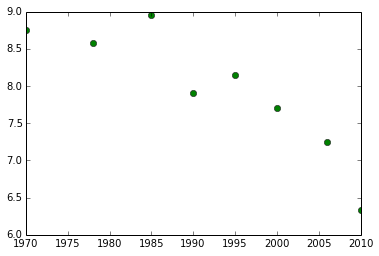

In [9]:
import matplotlib.pyplot as plt
 
x=np.array([1970, 1978, 1985, 1990, 1995, 2000, 2006, 2010], float)
y=np.array([8.75, 8.58, 8.95, 7.90, 8.15, 7.70, 7.25, 6.33], float)
plt.plot(x,y,  'go')

Matricea sistemului  de ecuatii  $ax_i+b=y_i$, $i=\overline{1,8}$, o constituim apeland functia

`np.vstack (tuple)` 

care genereaza  un array avand drept linii, array-urile 1D din tuple. Prin transpunerea array-ului generat avem matricea sistemului:

In [10]:
A=np.vstack((x, np.ones(x.size))).transpose()
print A
[[a, b], Er]=np.linalg.lstsq(A,y)[:2]# cerem returnarea primelor doua obiecte din lista globala
print 'dreapta celor mai mici patrate are parametrii a=', a, 'b=', b
print 'Media erorilor la patrat  este', Er/len(x)
print 'Media la bacalaureat predictionata de model pentru anul 2014 este', a*2014+b

[[  1.97000000e+03   1.00000000e+00]
 [  1.97800000e+03   1.00000000e+00]
 [  1.98500000e+03   1.00000000e+00]
 [  1.99000000e+03   1.00000000e+00]
 [  1.99500000e+03   1.00000000e+00]
 [  2.00000000e+03   1.00000000e+00]
 [  2.00600000e+03   1.00000000e+00]
 [  2.01000000e+03   1.00000000e+00]]
dreapta celor mai mici patrate are parametrii a= -0.0555846850245 b= 118.662046398
Media erorilor la patrat  este [ 0.14511836]
Media la bacalaureat predictionata de model pentru anul 2014 este 6.7144907582


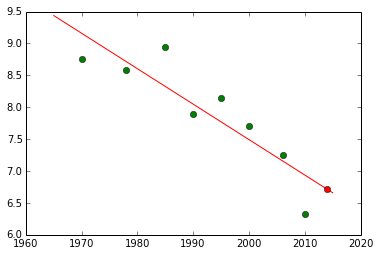

In [11]:
xx=[1965, 2015]
# dreapta este perfect determinata de doua puncte (1965, a*1965+b), (2015, a*2015+b)
yy=[]
for an in xx:
    yy.append(a*an+b)
plt.plot(xx, yy, 'r')# este trasata dreapta ce uneste punctele alese
plt.plot(x,y, 'go')# marcam datele din nou pentru a vedea pozitia fata de dreapta model
plt.plot(2014, a*2014+b, 'ro')# marcam pe dreapta punctul de coordonate (2014,a*2014+b) 


Din punct de vedere algebric dreapta celor mai mici patrate exista si este unica pentru orice set de date
$(x_i, y_i)$, $i=\overline{1,n}$, $n>2$, care nu apartin unei drepte verticale $y=c$. Nu intotdeauna insa dreapta celor mai mici patrate este modelul adecvat pentru date, asa cum se vede din exemplul urmator:


Dreapta celor mai mici patrate are parametrii a= 0.535426695817 b= 0.160863926309
Eroarea la patrat a celor mai mici patrate este [ 37.73342705]
Media erorii la patrat [ 2.69524479]


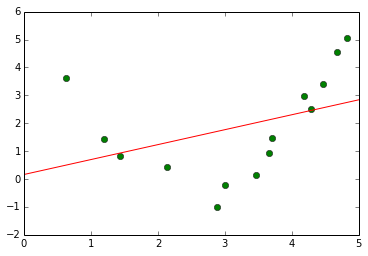

In [12]:

x=[ 0.63, 1.19, 1.44, 2.13,  2.88, 3, 3.46, 3.66, 3.71, 4.19,  4.29, 4.46, 4.67,  4.83]
y=[ 3.63, 1.42, 0.81, 0.43, -1.02, -0.22, 0.13, 0.93, 1.48,  2.97,  2.52, 3.41, 4.54,  5.07]
x=np.array(x)
y=np.array(y)
A=np.vstack((x, np.ones(x.size))).transpose()
plt.plot(x,y,  color="green", lw=2, ls='*', marker='o')
[[a, b], Er]=np.linalg.lstsq(A,y)[:2]
xx=[0, 5]
yy=[]
for elem in xx:
    yy.append(a*elem+b)
plt.plot(xx, yy, 'r')
print 'Dreapta celor mai mici patrate are parametrii a=', a, 'b=', b
print 'Eroarea la patrat a celor mai mici patrate este', Er
print 'Media erorii la patrat', Er/len(x)

Media erorii la patrat fiind mare, modelul liniar nu pare sa fie potrivit pentru aceste date.

Vizual
ne este sugerata ideea sa incercam un model patratic $y=a x^2+bx+c$.

Impunand ca cele 14 puncte $(x_i, y_i)$ sa verifice ecuatia patratica,
$ ax_i^2+bx_i+c=y_i$,
obtinem un sistem de 14 ecuatii cu 3 necunoscute, $a, b, c$:


$$\left[\begin{array}{ccc} x_1^2&x_1&1\\
 x_2^2&x_2&1\\
\vdots&\vdots&\vdots\\
x_n^2&x_n&1\end{array}\right]
\left[\begin{array}{c} a\\b\\c\end{array}\right]
=\left[\begin{array}{c}y_1\\y_2\\\vdots\\y_n\end{array}\right]$$
Sa-i determinam solutia celor mai mici patrate:

[[  0.3969   0.63     1.    ]
 [  1.4161   1.19     1.    ]
 [  2.0736   1.44     1.    ]
 [  4.5369   2.13     1.    ]
 [  8.2944   2.88     1.    ]
 [  9.       3.       1.    ]
 [ 11.9716   3.46     1.    ]
 [ 13.3956   3.66     1.    ]
 [ 13.7641   3.71     1.    ]
 [ 17.5561   4.19     1.    ]
 [ 18.4041   4.29     1.    ]
 [ 19.8916   4.46     1.    ]
 [ 21.8089   4.67     1.    ]
 [ 23.3289   4.83     1.    ]]
Parabola celor mai mici patrate are parametrii a= 1.08768693133 b= -5.55411054235 c= 6.64995629202
Eroarea medie [ 0.12060332]


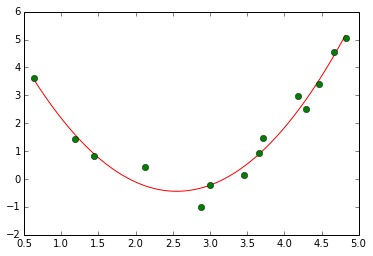

In [13]:
n=len(x)
A=np.vstack((x*x, x, np.ones(x.size))).transpose()
print A
[[a, b, c], Er]=np.linalg.lstsq(A,y)[:2]
print 'Parabola celor mai mici patrate are parametrii a=', a, 'b=', b, 'c=', c
print 'Eroarea medie', Er/n
X=np.arange(x[0], x[n-1], 0.01)
plt.plot(X, a*X*X+b*X+c, 'r')
#nu am  apelat plt.plot(x, a*x*x+b*x+c, 'r') pt ca plt.plot uneste punctele 
#consecutive (x[i], y[i]), (x[i+1], y[i+1])
#prin segmente de dreapta si punctele fiind "rare" nu era trasata o parabola,
# ci o succesiune de segmente ce o aproximeaza. Testati!!!
plt.plot(x,y,  color="green", lw=2, ls='*', marker='o')

Atat eroarea medie, cat si figura de mai sus ilustreaza ca modelul patratic (parabola celor mai mici patrate) este mai adecvat pentru datele considerate.

In semestrul doi metoda cel mai mici patrate va fi rafinata prin analiza  regresiei.

In secventele de cod de mai sus am urmat metoda manuala de calcul a dreptei, respectiv parabolei celor mai mici patrate,
adica am constituit matricea sistemului supradeterminat asociat si am apelat functia `lstsq`, pentru a ilustra 
legatura cu solutia celor mai mici patrate.



Setului de date
$(x_i, y_i)$, $i=\overline{0,n-1}$, $n>k$,  i se poate asocia polinomul de grad $k$ al celor mai mici patrate,
$y=p[0]x^k+p[1]x^{k-1}+\cdots+p[k-1]x+p[k]$, apeland direct functia `np.polyfit(x,y,k)`.

Array-ul `x`, ca argument al functiei, contine abscisele punctelor $(x_i, y_i)$, iar `y`, ordonatele lor.

Functia returneaza coeficientii polinomului si optional reziduul si alte informatii:
    [numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

In [14]:
p=np.polyfit(x,y,2)
print p

[ 1.08768693 -5.55411054  6.64995629]


In [2]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()